In [10]:
from pathlib import Path

# specify the folder path
folder_path = Path('replay_jsons/')

# get a list of all files in the folder
file_list = folder_path.glob('*.json')

# sort the list based on last modified time
file_list = sorted(file_list, key=lambda x: x.stat().st_mtime)

# print the list of files in order of last modified time
for file in file_list:
    print(file.name)

crash_update_enemy_units.json
early_crash.json


In [11]:
file_to_view = file_list[-1]
file_to_view

WindowsPath('replay_jsons/early_crash.json')

In [47]:
import json
from dictor import dictor
from pprint import pprint
with open(file_to_view, 'r') as f:
    full_replay = json.load(f)

In [51]:
seed = dictor(full_replay, 'configuration.seed')
my_team = dictor(full_replay, 'info.TeamNames').index('Tim Child')
replay_steps = full_replay['steps']
print(f'seed = {seed}\nmy team = {my_team}')

seed = 178220973
my team = 0


In [58]:
replay_steps[2][0]['action']

{'metal': 150, 'spawn': [28, 16], 'water': 150}

In [65]:
from luxai_s2 import LuxAI_S2

from agent import Agent
from util import show_env

In [64]:
agent.player, opp_player, env.possible_agents, env.agents

('player_0', 'player_1', ['player_0', 'player_1'], [])

In [73]:
replay_steps[1][opp_team]['action']

{'bid': 0, 'faction': 'FirstMars'}

INFO:root:initializing agent for player player_0
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1


{'player_0': {'faction': 'TheBuilders', 'bid': 0}, 'player_1': {'bid': 0, 'faction': 'FirstMars'}}


INFO:root:player_0 Early setup action {'spawn': (28, 16), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_0 Beginning of step update for step 3


{'player_0': {'spawn': (28, 16), 'metal': 150, 'water': 150}, 'player_1': {}}
{'player_0': {}, 'player_1': {'metal': 300, 'spawn': [2, 9], 'water': 300}}


INFO:root:player_0 Early setup action {'spawn': (12, 2), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 4
INFO:root:player_0 Early setup action {}
INFO:root:player_0 Beginning of step update for step 5


{'player_0': {'spawn': (12, 2), 'metal': 150, 'water': 150}, 'player_1': {}}
{'player_0': {}, 'player_1': {'metal': 300, 'spawn': [10, 32], 'water': 300}}


INFO:root:player_0 Early setup action {'spawn': (43, 13), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 6
INFO:root:player_0 Early setup action {}
INFO:root:player_0 Beginning of step update for step 7


{'player_0': {'spawn': (43, 13), 'metal': 150, 'water': 150}, 'player_1': {}}
{'player_0': {}, 'player_1': {'metal': 150, 'spawn': [21, 46], 'water': 150}}


INFO:root:player_0 Early setup action {'spawn': (44, 21), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 8
INFO:root:player_0 Early setup action {}
INFO:root:player_0 Beginning of step update for step 9


{'player_0': {'spawn': (44, 21), 'metal': 150, 'water': 150}, 'player_1': {}}
{'player_0': {}, 'player_1': {'metal': 0, 'spawn': [8, 7], 'water': 0}}


INFO:root:player_0 Early setup action {'spawn': (40, 24), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 10
INFO:root:player_0 Early setup action {}


{'player_0': {'spawn': (40, 24), 'metal': 150, 'water': 150}, 'player_1': {}}
{'player_0': {}, 'player_1': {'metal': 0, 'spawn': [20, 27], 'water': 0}}


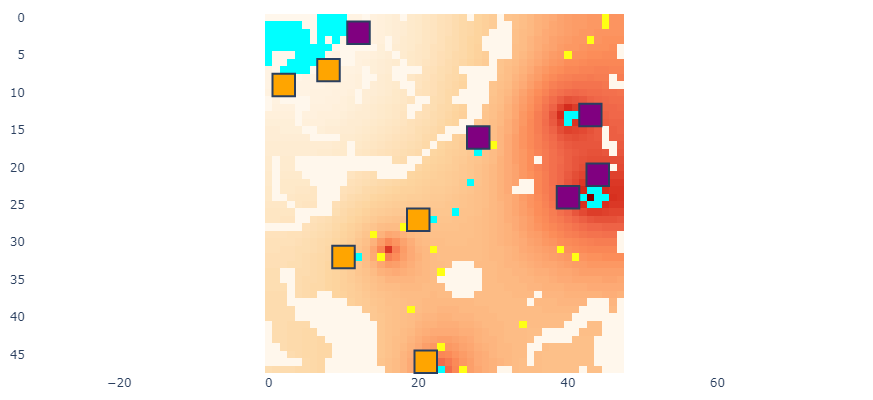

In [92]:
# Initialize same as replay
env = LuxAI_S2()
obs = env.reset(seed=seed)  # resets an environment with a seed
# Do I need to set env_cfg from replay?

# Initialize my agent for whichever team I was on
agent = Agent(f'player_{my_team}', env.state.env_cfg)
opp_team = 0 if my_team == 1 else 1
opp_player = f'player_{opp_team}'

step = 0
while env.state.real_env_steps < 0:
    actions = {
        agent.player: agent.early_setup(step, obs[agent.player]),
        opp_player: replay_steps[step+1][opp_team]['action']
    }
    print(actions)
    step += 1
    obs, rewards, dones, infos = env.step(actions)
    # break
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

## Run one step at a time

In [97]:
print(f"Carrying out step {step}")
actions = {
    agent.player: agent.act(step, obs[agent.player]),
    opp_player: replay_steps[step+1][opp_team]['action']
}
step += 1
obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

INFO:root:player_0 Beginning of step update for step 12
INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2


Carrying out step 12


IndexError: list index out of range

In [99]:
agent.mining_planner._generate_routes()

INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.LIGHT, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2
INFO:root:Path len 0 for 0, UnitType.HEAVY, factory_2


{'LIGHT': {0: {'factory_0': MiningRoutes(paths=[array([[28, 16],
          [28, 17],
          [28, 18]]), array([[28, 16],
          [28, 17],
          [28, 18],
          [29, 18],
          [29, 19],
          [29, 20],
          [29, 21],
          [29, 22],
          [28, 22],
          [27, 22]]), array([[28, 16],
          [28, 17],
          [28, 18],
          [27, 18],
          [26, 18],
          [25, 18],
          [25, 19],
          [25, 20],
          [25, 21],
          [25, 22],
          [25, 23],
          [25, 24],
          [25, 25],
          [25, 26]])], costs=[4, 11, 23], values=[21, 14, 2]),
   'factory_2': MiningRoutes(paths=[[], [], []], costs=[0, 0, 0], values=[25, 25, 25]),
   'factory_4': MiningRoutes(paths=[array([[43, 13],
          [42, 13],
          [41, 13]]), array([[43, 13],
          [42, 13],
          [41, 13],
          [40, 13]]), array([[43, 13],
          [42, 13],
          [41, 13],
          [41, 14],
          [40, 14]])], costs=[6, 10

{'factory_0': <factory_manager.FactoryManager at 0x14963e74e80>,
 'factory_2': <factory_manager.FactoryManager at 0x14963e74280>,
 'factory_4': <factory_manager.FactoryManager at 0x14963ac51c0>,
 'factory_6': <factory_manager.FactoryManager at 0x14963ac55b0>,
 'factory_8': <factory_manager.FactoryManager at 0x14963ac5580>}